## **DNA Sequencing Classification Using Machine Learning**

##### *In this notebook, I will apply **Machine learning model  to classify DNA sequences and predict gene functions** based on their coding sequences.*

In [141]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [142]:
# Load the data
human_data = pd.read_table('human.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


#### **Preprocessing the Data**

In [143]:
human_data.dtypes

sequence    object
class        int64
dtype: object

In [144]:
human_data.columns

Index(['sequence', 'class'], dtype='object')

In [145]:
# value count of class
human_data['class'].value_counts().sort_values(ascending=False)


class
6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: count, dtype: int64

**Plot the Class Distribution: Use the value_counts() method to get the counts of each class and plot it.**

Text(0, 0.5, 'Count')

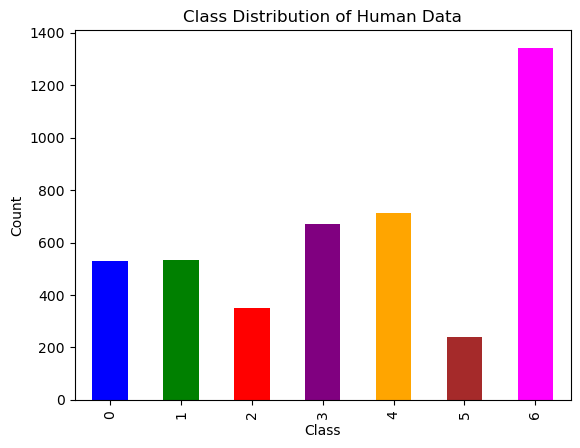

In [146]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'magenta']
human_data['class'].value_counts().sort_index().plot.bar(color=colors)

# Add labels and title for better visualization
plt.title('Class Distribution of Human Data')
plt.xlabel('Class')
plt.ylabel('Count')
#This sorts the counts by the class label (the index). This ensures the classes appear in ascending order (0, 1, 2, ..., 6) in the plot.
#The x-axis represents the class labels (e.g., 0, 1, 2, ...), and the y-axis shows the number of occurrences for each class.

In [147]:
human_data.isnull().sum()

sequence    0
class       0
dtype: int64

#### **Generate k-mers from DNA Sequences** ####

**K-mers help transform DNA sequences into a numerical format that Model can understand.\
The process involves generating k-mers, counting their frequencies, and using these counts as features for training the model.**

In [148]:
# Define K for hexamers
K = 6

# Function to generate hexamers
def generate_hexamers(sequence, K):
    return [sequence[i:i+K].lower() for i in range(len(sequence)-K +1)]

 **The lambda x : part means for each sequence x in the sequence column, the lambda function will process it.** \
**The join() function is used to take the list of hexamers and join them into a single string where each hexamer is separated by a space.**


In [149]:
# Apply hexamer generation to each sequence in the DataFrame
human_data['words'] = human_data['sequence'].apply(lambda x : " ".join(generate_hexamers(x,K),))
human_data = human_data.drop('sequence', axis=1)

In [150]:
human_data.tail()

,class,words
4375,0,atggaa tggaag ggaaga gaagat aagatt agattt gatt...
4376,6,atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4377,6,atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4378,6,atgggg tggggc ggggca gggcac ggcacc gcacct cacc...
4379,6,atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...


In [151]:
x = human_data['words']
x

0       atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1       atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4       atgcaa tgcaac gcaaca caacag aacagc acagca cagc...
                              ...                        
4375    atggaa tggaag ggaaga gaagat aagatt agattt gatt...
4376    atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4377    atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4378    atgggg tggggc ggggca gggcac ggcacc gcacct cacc...
4379    atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
Name: words, Length: 4380, dtype: object

In [152]:
human_data.columns

Index(['class', 'words'], dtype='object')

In [153]:

y = human_data.iloc[:, 0].values 
y

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

#### **Vectorize the Hexamers using CountVectorizer** #####

##### CountVectorizer transforms the text representation of hexamers into a numerical format (matrix) where each row corresponds to a sequence and each column corresponds to a unique hexamer. #####
CountVectorizer is used to convert DNA sequences into feature vectors by extracting k-mers (n-grams).

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
cv = CountVectorizer(ngram_range=(4,4))

**fit_transform converts the text data into a numerical matrix of token counts.**

In [155]:
# Fit and transform the training data
X = cv.fit_transform(x)

In [156]:
X.shape

(4380, 232414)

**Data Splitting: We split the dataset into training and test sets using the preprocessed hexamers.**

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Matrix:** We print the shape of the feature matrix (X) to verify the number of samples (rows) and the number of unique hexamers (columns).

In [158]:
X_train

<3504x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 4318484 stored elements in Compressed Sparse Row format>

In [159]:
print(X_train)

  (0, 88279)	1
  (0, 193664)	1
  (0, 74510)	1
  (0, 12268)	1
  (0, 53727)	1
  (0, 103535)	1
  (0, 48891)	1
  (0, 145190)	1
  (0, 211412)	1
  (0, 76300)	1
  (0, 231590)	1
  (0, 229177)	1
  (0, 219683)	1
  (0, 13661)	1
  (0, 192997)	1
  (0, 6546)	1
  (0, 120795)	1
  (0, 30448)	1
  (0, 212310)	1
  (0, 153448)	1
  (0, 131309)	1
  (0, 58125)	1
  (0, 229178)	1
  (0, 219687)	1
  (0, 56054)	1
  :	:
  (3503, 99280)	1
  (3503, 2039)	1
  (3503, 7925)	1
  (3503, 25678)	1
  (3503, 101573)	1
  (3503, 157218)	1
  (3503, 20228)	1
  (3503, 41334)	1
  (3503, 162661)	1
  (3503, 182036)	1
  (3503, 203879)	1
  (3503, 223357)	1
  (3503, 196273)	1
  (3503, 22026)	1
  (3503, 87013)	1
  (3503, 104760)	1
  (3503, 187665)	1
  (3503, 121545)	1
  (3503, 113515)	1
  (3503, 221400)	1
  (3503, 188621)	1
  (3503, 180945)	1
  (3503, 167369)	1
  (3503, 25351)	1
  (3503, 100331)	1


In [160]:
y_test

array([2, 0, 4, 6, 3, 6, 4, 2, 6, 6, 0, 6, 0, 6, 6, 6, 6, 1, 4, 1, 6, 3,
       4, 4, 4, 6, 0, 6, 6, 6, 2, 6, 3, 6, 3, 0, 0, 6, 3, 4, 3, 0, 0, 5,
       3, 0, 6, 6, 1, 2, 1, 3, 0, 5, 0, 5, 2, 6, 4, 1, 5, 1, 4, 4, 4, 4,
       4, 3, 4, 2, 2, 3, 4, 5, 0, 3, 6, 1, 6, 1, 4, 1, 6, 3, 1, 6, 6, 4,
       1, 2, 4, 3, 4, 3, 1, 1, 6, 6, 1, 1, 5, 1, 6, 3, 6, 4, 4, 1, 2, 0,
       6, 3, 5, 4, 6, 6, 5, 6, 6, 6, 3, 0, 0, 4, 4, 1, 2, 0, 4, 6, 5, 2,
       5, 6, 1, 2, 4, 4, 6, 1, 3, 2, 3, 5, 6, 6, 1, 5, 6, 4, 3, 6, 6, 6,
       6, 2, 3, 6, 0, 6, 6, 3, 1, 0, 5, 2, 4, 2, 1, 4, 5, 4, 6, 6, 6, 6,
       6, 3, 4, 4, 2, 2, 1, 1, 2, 6, 6, 6, 6, 0, 4, 0, 4, 2, 1, 2, 3, 0,
       6, 4, 6, 1, 2, 1, 4, 4, 3, 5, 6, 4, 6, 0, 4, 1, 0, 1, 3, 3, 5, 6,
       6, 0, 0, 6, 3, 0, 0, 6, 5, 2, 0, 1, 5, 3, 1, 1, 6, 6, 1, 3, 2, 4,
       3, 6, 6, 3, 4, 6, 4, 4, 0, 3, 4, 3, 6, 1, 4, 6, 6, 6, 6, 0, 0, 6,
       6, 6, 6, 4, 4, 3, 3, 1, 4, 6, 4, 6, 4, 2, 3, 2, 6, 3, 3, 6, 2, 6,
       6, 1, 1, 5, 0, 5, 3, 1, 3, 6, 2, 2, 4, 1, 6,

### **Initialize the Naive Bayes** ###

In [161]:
# Model Building
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

MultinomialNB()

In [162]:
# Now test the model
clf.score(X_test, y_test)* 100

98.40182648401826

#### **Make Predictions:** Use the model to predict the classes of the test set. ####

In [163]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

##### **Evaluate Model Performance:** Finally, print the confusion matrix and classification report to understand how well the model performed. #####

In [164]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)

Accuracy: 98.40182648401826


#### Check the Confusion Matrix, Classification Report ####

In [165]:
print(f"Final Accuracy: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Final Accuracy: 98.4018
Confusion Matrix:
[[ 98   0   0   0   1   2   1]
 [  0 104   0   0   0   0   2]
 [  0   0  78   0   0   0   0]
 [  0   0   0 124   1   0   0]
 [  0   0   0   0 146   0   3]
 [  0   0   0   0   0  51   0]
 [  0   0   0   1   2   1 261]]


In [166]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.97      0.98      0.98       149
           5       0.94      1.00      0.97        51
           6       0.98      0.98      0.98       265

    accuracy                           0.98       876
   macro avg       0.98      0.99      0.98       876
weighted avg       0.98      0.98      0.98       876



In [167]:
# Save the model to a file
import pickle
filename = 'dna_model.pkl'

 ##### **Naive Bayes model** performed quite well on the DNA sequence classification task, with an **overall accuracy of 98%**. #####
 ##### The **precision, recall, and F1-scores** for individual classes are also high, which suggests that the model is able to classify sequences into the correct categories with good consistency. #####